In [ ]:
# import fredapi
# supress intstall output
!pip install fredapi > /dev/null

In [ ]:
#@title
# import neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

# default plotting style
plt.style.use('fivethirtyeight')
# max columns to view
pd.set_option("display.max_columns", 500)
# color palette list
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# import Fred
from fredapi import Fred

# Fred API
fred_key = "Add Fred API Key"

# Create Fred Object

In [ ]:
fred = Fred(api_key=fred_key)

# Search Economic Data

In [ ]:
sp_search = fred.search('S&P', order_by='popularity')

In [ ]:
#view top rows
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-05,2023-08-05,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 09:17:08-05:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-05,2023-08-05,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-05,2023-08-05,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-03,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 09:17:11-05:00,83,This data represents the effective yield of th...
SP500,SP500,2023-08-05,2023-08-05,S&P 500,2013-08-05,2023-08-04,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-04 19:10:52-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-05,2023-08-05,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,82,Household data are collected as of March. As ...


# Pull Raw Data

# Pull and Join Mulitple Data Series

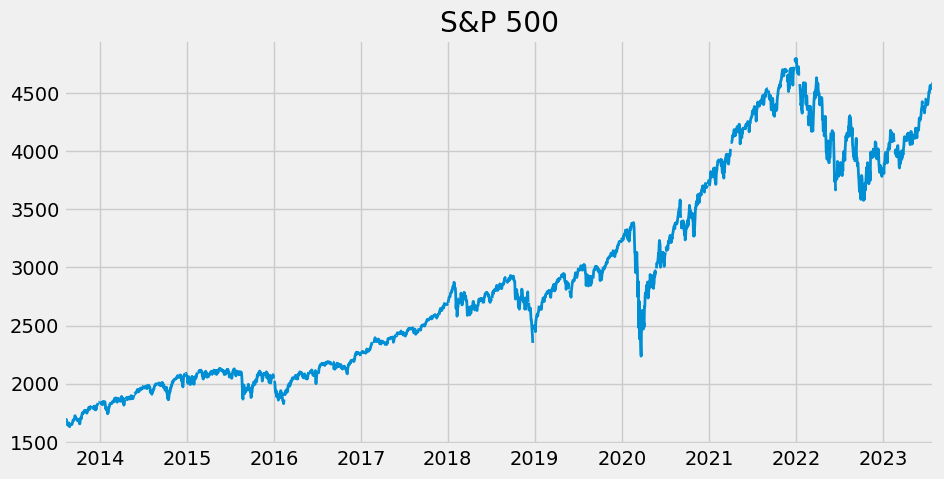

In [ ]:
#@title Default title text
variable_name = 0
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)
plt.show()

In [ ]:
unemp_results = fred.search('unemployment')

In [ ]:
unrate = fred.get_series('UNRATE')

In [ ]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-02-01    3.6
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
Length: 906, dtype: float64

<Axes: title={'center': 'Unemployment Rate'}>

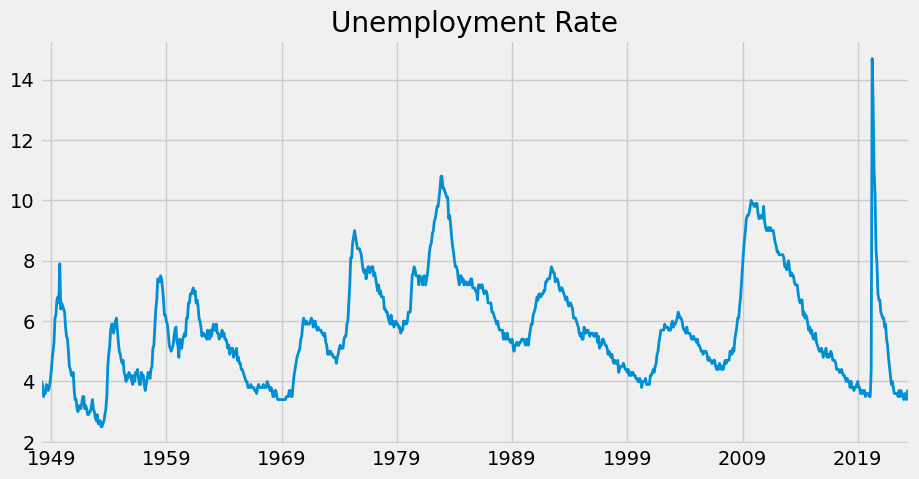

In [ ]:
#unemployment rate percentage
unrate.plot(figsize=(10, 5), title='Unemployment Rate', lw=2)

In [ ]:
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-05,2023-08-05,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-05,2023-08-05,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,54,The unemployment rate represents the number of...
CCSA,CCSA,2023-08-05,2023-08-05,Continued Claims (Insured Unemployment),1967-01-07,2023-07-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-03 07:33:05-05:00,75,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-08-05,2023-08-05,Continued Claims (Insured Unemployment),1967-01-07,2023-07-22,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-08-03 07:33:10-05:00,39,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-08-05,2023-08-05,Unemployment Level,1948-01-01,2023-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-08-04 07:45:25-05:00,68,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MIKENT1URN,MIKENT1URN,2023-08-05,2023-08-05,"Unemployment Rate in Kent County, MI",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:17:03-05:00,5,These data come from the Current Population Su...
NYQUEE1URN,NYQUEE1URN,2023-08-05,2023-08-05,"Unemployment Rate in Queens County, NY",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:14:02-05:00,5,These data come from the Current Population Su...
CASONO6URN,CASONO6URN,2023-08-05,2023-08-05,"Unemployment Rate in Sonoma County, CA",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:21:05-05:00,5,These data come from the Current Population Su...


In [ ]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]


In [ ]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [ ]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [ ]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [ ]:
# Plot States Unemployment Rate
px.line(uemp_states)

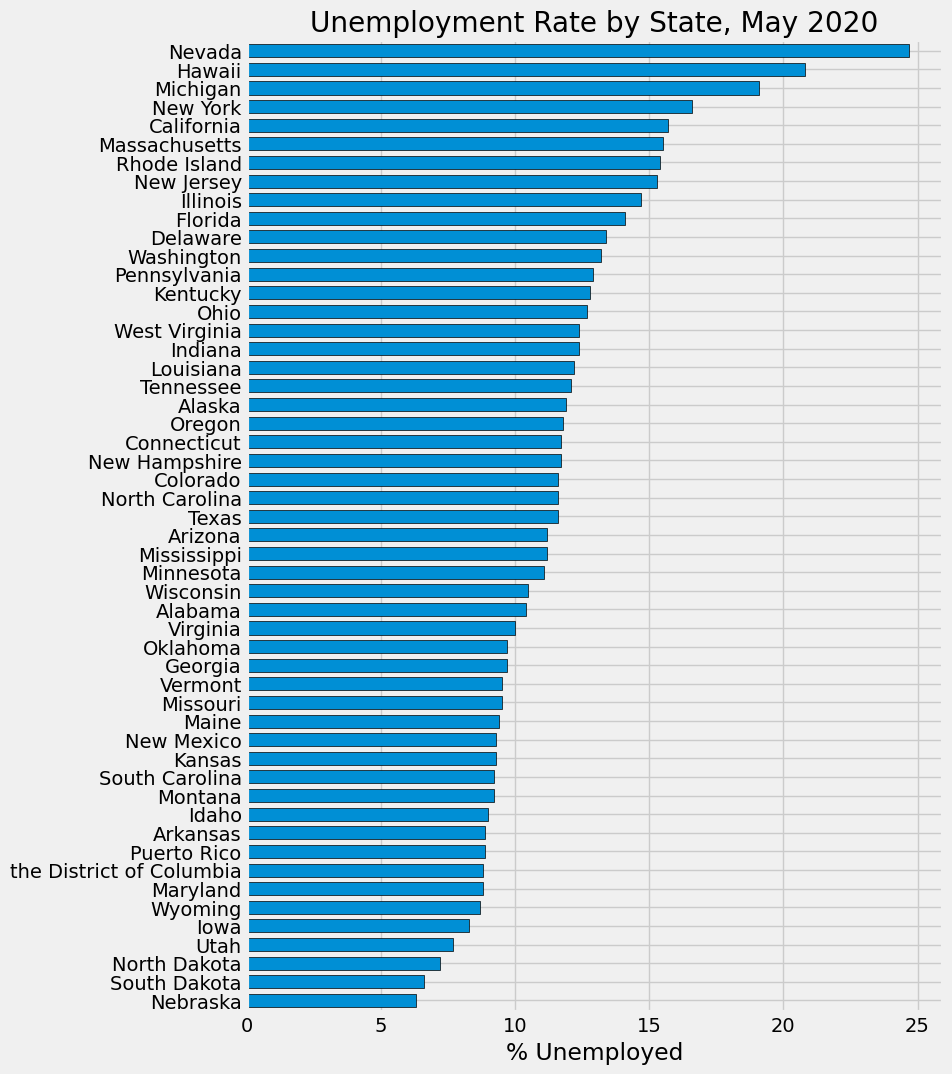

In [ ]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

In [ ]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [ ]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request too fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [ ]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

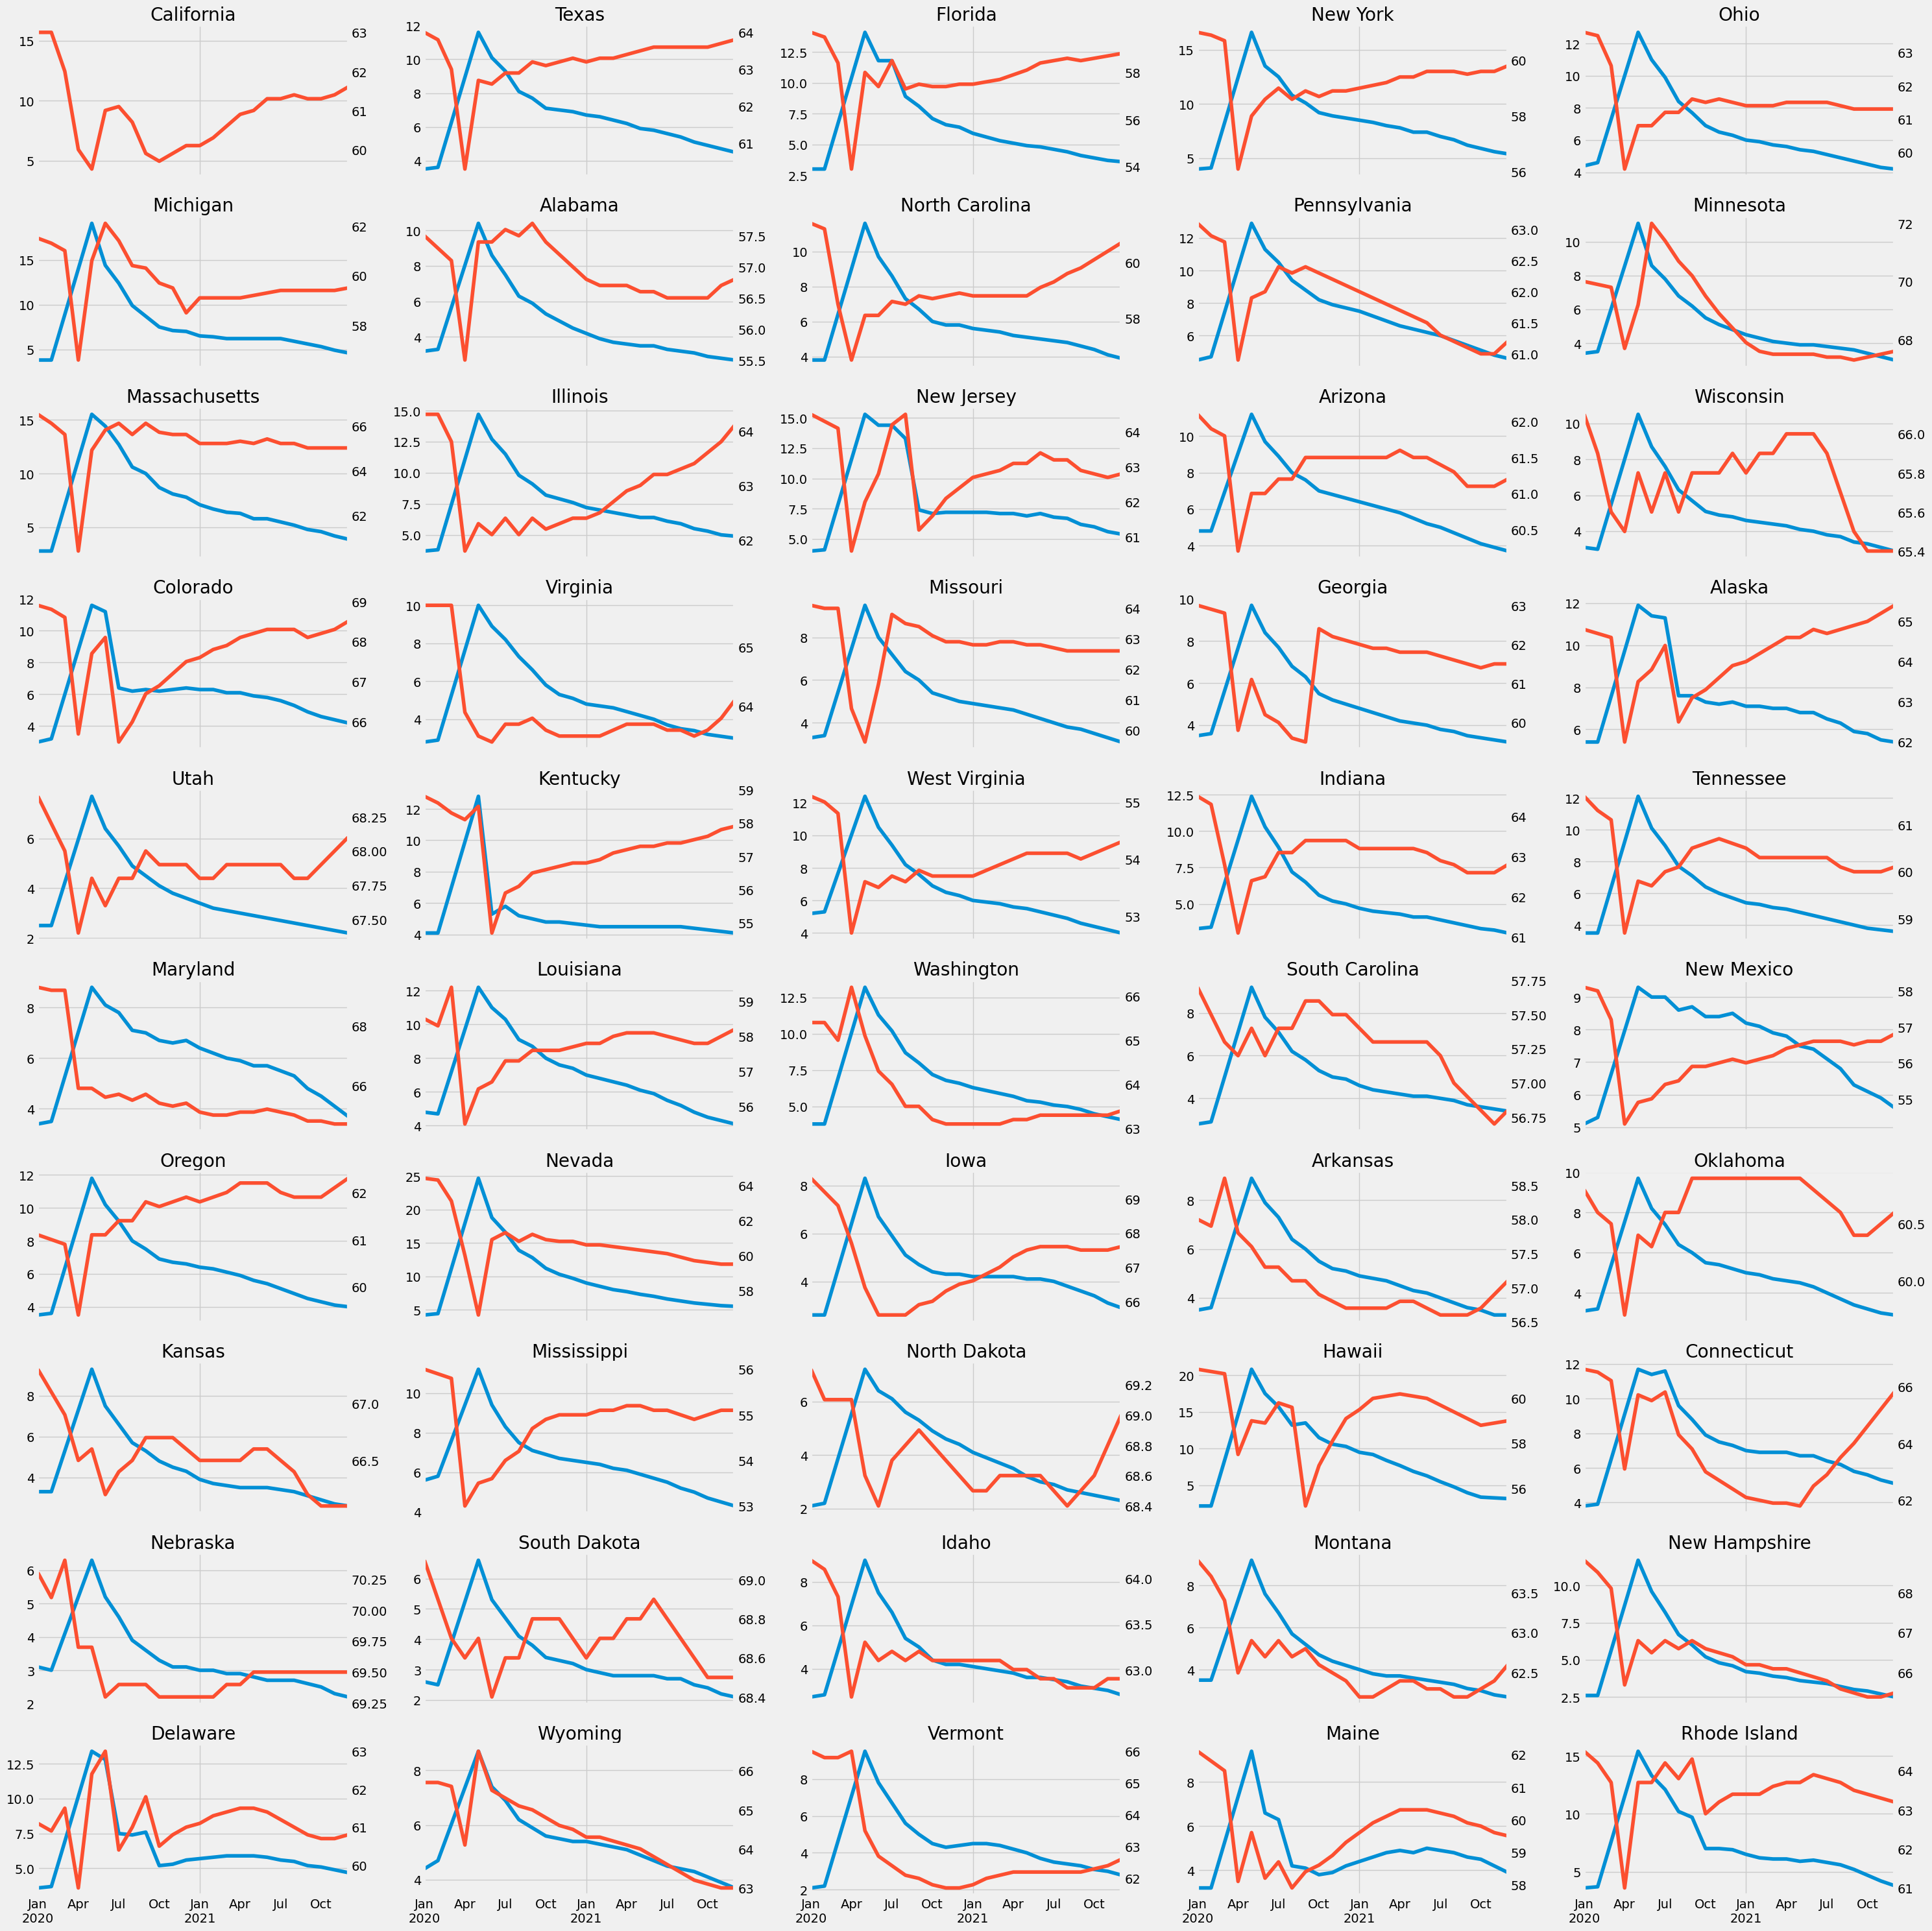

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

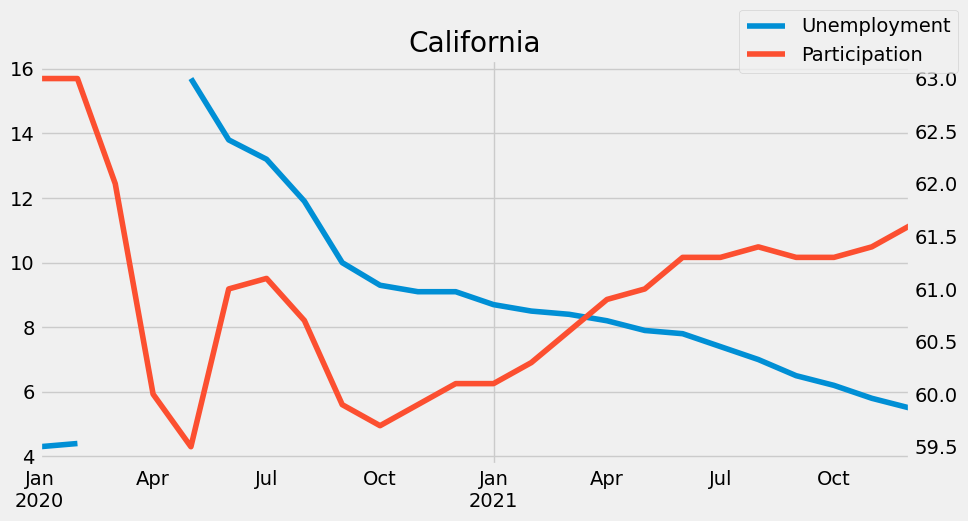

In [ ]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()